# Gold Recovery Optimization Project

Project Description:
Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.

The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.

The model will help to optimize the production and eliminate unprofitable parameters.

You need to:

- Prepare the data;
- Perform data analysis;
- Develop and train a model.

<b><u> Step 1. Prepare the data

<b> Step 1.1: Open the files and look into the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
print(train.shape, test.shape, full.shape)

(16860, 87) (5856, 53) (22716, 87)


In [4]:
#print(train.info())

In [5]:
#print(test.info())

In [6]:
#print(full.info())

In [7]:
# Let's check how many columns have null values in each dataset
print(f'There are {train.isna().any().sum()} columns in the Train dataset with at least 1 NA value')
print(f'There are {test.isna().any().sum()} columns in the Test dataset with at least 1 NA value')
print(f'There are {full.isna().any().sum()} columns in the Recovery dataset with at least 1 NA value')

There are 85 columns in the Train dataset with at least 1 NA value
There are 51 columns in the Test dataset with at least 1 NA value
There are 85 columns in the Recovery dataset with at least 1 NA value


In [8]:
# Let's look at the top 10 columns with most NA values for each set
train_na = train.isna().sum().sort_values(ascending = False).head()
test_na = test.isna().sum().sort_values(ascending = False).head()
full_na = full.isna().sum().sort_values(ascending = False).head()
print(train_na)
print()
print(test_na)
print()
print(full_na)

rougher.output.recovery              2573
rougher.output.tail_ag               2250
rougher.output.tail_sol              2249
rougher.output.tail_au               2249
secondary_cleaner.output.tail_sol    1986
dtype: int64

rougher.input.floatbank11_xanthate    353
primary_cleaner.input.sulfate         302
primary_cleaner.input.depressant      284
rougher.input.floatbank10_sulfate     257
primary_cleaner.input.xanthate        166
dtype: int64

rougher.output.recovery               3119
rougher.output.tail_ag                2737
rougher.output.tail_au                2736
rougher.output.tail_sol               2736
rougher.input.floatbank11_xanthate    2257
dtype: int64


In [9]:
# Check for duplicate entries
print(test.duplicated().sum())
print(train.duplicated().sum())
print(full.duplicated().sum())

0
0
0


<span style=color:blue> Comments: I started by opening up the 3 files and renaming them as train, test and full. Then I ran .shape on all 3 datasets and learned that they are quite large because train dataset has 16860 entries and 87 columns, test dataset has 5856 entries and 53 columns and full dataset has 22716 entries and 87 columns. I used info to view all the column names and data types for each dataset. Additionally, info shows that each dataset has numerous columns with null values. Just to check how many columns have null values I ran train.isna().any().sum() on each set and outcomes showed, 85 out of 87 for train, 51  out of 53 for test and 85 out of 87 for full sets have at least 1 NA value. I further looked at the top 5 columns of null values in each dataset and realized there are indeed a lot of null values in each datset. As such, it would not be a good idea to simply remove all the null values as we may end up significantly altering the datasets. I also ran a duplicated() on each to see if there were any rows that were copies, if so we could eliminate them but alas there were 0 duplicates found in each dataset. Since the prompt doesn't ask to do anything with the datasets I decided to continue for now and conduct preprocessing when prompted.

<b> Step 1.2: Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings

In [10]:
# Let's define each variable in the Recovery Formula and then the Formula itself

C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

recovery_calc = ((C * (F - T)) / (F * (C - T))) * 100
recovery_actual = train['rougher.output.recovery']

mae = np.mean(abs(recovery_calc - recovery_actual))
print(f'The MAE between calculated recovery and actual recovery is {mae}')

The MAE between calculated recovery and actual recovery is 9.303415616264301e-15


<span style='color:blue'> Comments: In order to check the recovery, I started with the variables in the recovery formula (C, T, F). I used the Process Flow Chart in the Sprint section "Technological Process" to understand that each variable refers to a specific column. For example, variable C is calling out Step #3 which is the column, 'rougher.output.concentrate_au'. Likewise, T and F link to columns, 'rougher.output.tail_au' and 'rougher.input.feed_au', respectively. So I started by defining those variables as those columns from the training dataset (as per the prompt). Then I definted the recovery forumla (as provided in Technological Process section).

<span style='color:blue'> Comments: I calculated the MAE by subtracting the recovery calculations from the formula above and the actual recovery values from the rougher.output.recovery feature in the train set. I took the absolute value of that difference and found the mean, which resulted in a MAE value of 9.3e-15 which is basically zero. This means that the recovery feature is calculated correctly in the training dataset.

<b> Step 1.3: Analyze the features not available in the test set. What are these parameters? What is their type?

In [11]:
# let's compare the features in the test set with those in the train set and find the missing ones
train_features = train.columns
test_features = test.columns
test_features_missing = set(train_features) - set(test_features)
train[test_features_missing].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   primary_cleaner.output.tail_sol                     16579 non-null  float64
 1   primary_cleaner.output.concentrate_pb               16502 non-null  float64
 2   rougher.output.tail_sol                             14611 non-null  float64
 3   rougher.output.tail_au                              14611 non-null  float64
 4   rougher.output.recovery                             14287 non-null  float64
 5   final.output.tail_pb                                16677 non-null  float64
 6   final.output.concentrate_ag                         16788 non-null  float64
 7   primary_cleaner.output.tail_au                      16777 non-null  float64
 8   primary_cleaner.output.concentrate_ag               16778 non-null  float64


<span style = color:blue> Comments: In order to analyze the features not in the test set, I simply subtracted the columns of the test set from the columns of the train set. All remaining columns found in the train set are the features not available in the test set. Running the info method shows that there are 34 columns and all of them are float data types. Note: it is not surprising to see features that are missing from the test set because the prompt already tells us that "some of the features that are present in the training set may be absent from the test set", as such, we expect there to be missing features.

<b> 1.4: Perform Data Preprocessing

In [12]:
# Let's apply the forward fill startegy for dealing with the null values

train = train.fillna(method='ffill').dropna()
test = test.fillna(method='ffill').dropna()
full = full.fillna(method='ffill').dropna()

In [13]:
print(train.isna().sum().sort_values(ascending=False).head())
print()
print(test.isna().sum().sort_values(ascending=False).head())
print()
print(full.isna().sum().sort_values(ascending=False).head())

date                                 0
rougher.state.floatbank10_b_air      0
rougher.state.floatbank10_f_air      0
rougher.state.floatbank10_e_level    0
rougher.state.floatbank10_e_air      0
dtype: int64

date                                 0
rougher.state.floatbank10_c_air      0
rougher.state.floatbank10_d_air      0
rougher.state.floatbank10_d_level    0
rougher.state.floatbank10_e_air      0
dtype: int64

date                                 0
rougher.state.floatbank10_b_air      0
rougher.state.floatbank10_f_air      0
rougher.state.floatbank10_e_level    0
rougher.state.floatbank10_e_air      0
dtype: int64


<span style = color:blue> Comments: In order to address all the null values, I decided it was not a good idea to drop all null values since there are way too many of them and we could potentially skew data be deleting these entries. As such a new strategy here would be to apply forward fill and I believe this works here because the prompt tells us that "Parameters that are next to each other in terms of time are often similar." Therefore, we can make the assumption that entries with null values should be similar to the entries with non-null values preceeding them in date and time. This may still not be a 100% accurate but it will be more reliable than eliminating the null values. 

<span style = color:blue> Comments: After applying the forward fill, we can verify with the .isna() method and see that there are no more null values in any of the datasets. As such, we can move on to Step 2.

<b> 2.1: Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [14]:
# Let's look at the concentrations of Au, Ag and Pb at the different purfication stages

au_concentration = train[['rougher.input.feed_au','rougher.output.concentrate_au',
                          'primary_cleaner.output.concentrate_au','final.output.concentrate_au']]

ag_concentration = train[['rougher.input.feed_ag','rougher.output.concentrate_ag',
                          'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]

pb_concentration = train[['rougher.input.feed_pb','rougher.output.concentrate_pb',
                          'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]

In [15]:
au_concentration.head()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141


In [16]:
ag_concentration.head()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599


In [17]:
pb_concentration.head()

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511


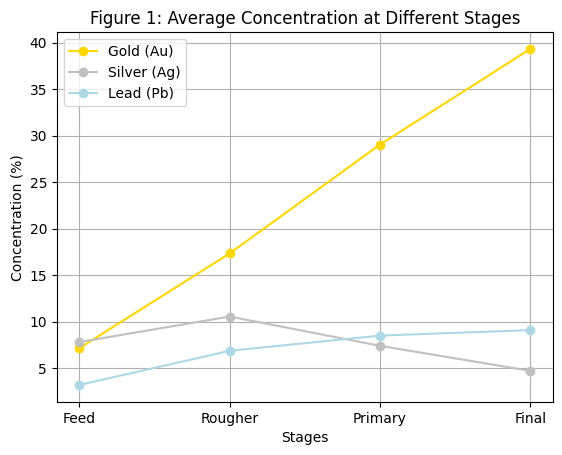

In [18]:
# Let's take the average of each column so we have 1 point per column and that graph that for visualization
stages = ['Feed', 'Rougher', 'Primary', 'Final']
plt.plot(stages, au_concentration.mean(), marker = 'o', label = 'Gold (Au)', color = 'gold')
plt.plot(stages, ag_concentration.mean(), marker = 'o', label = 'Silver (Ag)', color = 'silver')
plt.plot(stages, pb_concentration.mean(), marker = 'o', label = 'Lead (Pb)', color = 'lightblue')
plt.title('Figure 1: Average Concentration at Different Stages')
plt.xlabel('Stages')
plt.ylabel('Concentration (%)')
plt.legend()
plt.grid()
plt.show()


<span style = color:blue> Comments: Since we want to compare the concentrations of Au, Ag and Pb at the different purification stages, we need the columns 'primary_cleaner.output.concentrate_' and 'final.output.concentrate_', however, I added in two additional columns just to better understand the change in concentration. I added in the 'rougher.input.feed_'	and 'rougher.output.concentrate_' as well. Prior to proceeding with the next steps, I dropped all NA values since they would effectively bring down all the averages and mislead the data. I took the average of the concentration for each metal at each of these 4 stages (4 columns) and then plotted them together as line plots. 

<span style = color:blue> Comments: The graph above (Figure 1) shows how the concentration changes for each metal as it undergoes the different stages of this process. We can identify some clear observations in that, the concentration of Gold increases rapidly and linearly across each stage, with the final concentration being more than 4x as much as the initial concentration at the Feed stage. For lead, the concentration also increases but to a much smaller degree; we can see the Feed at under 5% and the Final is just around 10% so that is not a big increase at all. Nevertheless, both Gold and Lead do show an increase in concentration whereas Silver actually declines in concentration! The graph shows that Silver concentration is under 10% at the Feed then jumps to its peak over 11% at Rougher stage and then it drops twice as it undergoes the purification stages and ends up at 5% in the Final. This does seem unusual to someone who doesn't know anything about silver or metal extraction processes.

<b> 2.2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

In [19]:
# Let's Identify all columns that relate to the feed size in both the training and test sets
feed_size_train_col = [col for col in train.columns if 'size' in col.lower()]
feed_size_test_col = [col for col in test.columns if 'size' in col.lower()]
print(feed_size_train_col)
print(feed_size_test_col)

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']
['primary_cleaner.input.feed_size', 'rougher.input.feed_size']


In [20]:
# Let's assign our variables and view the data
feed_size_train = train[feed_size_train_col]
feed_size_test = test[feed_size_test_col]

print(f'Train Set: Summary Statistics: \n {feed_size_train.describe()}')
print()
print(f'Test Set: Summary Statistics: \n {feed_size_test.describe()}')

Train Set: Summary Statistics: 
        primary_cleaner.input.feed_size  rougher.input.feed_size
count                     16860.000000             16860.000000
mean                          7.297285                60.188595
std                           0.619166                30.522242
min                           1.080000                 9.659576
25%                           6.940000                47.548897
50%                           7.285000                54.066003
75%                           7.700000                65.397249
max                          10.470000               484.967466

Test Set: Summary Statistics: 
        primary_cleaner.input.feed_size  rougher.input.feed_size
count                      5856.000000              5856.000000
mean                          7.264651                55.898866
std                           0.611526                22.707969
min                           5.650000                 0.046369
25%                           6.885625

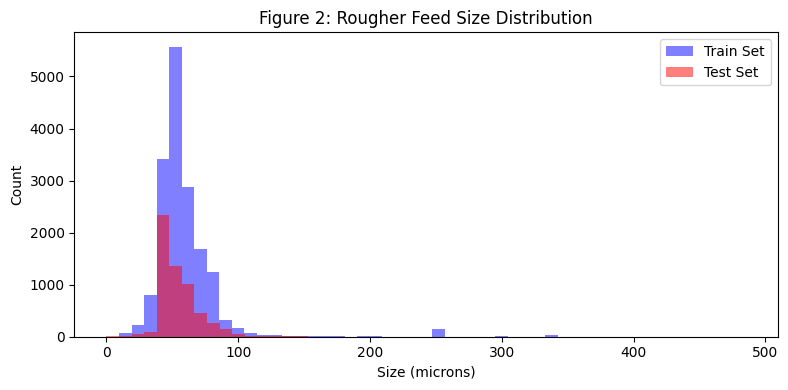

In [21]:
# Let's plot the distributions for the Rougher Input Feed Sizes for both sets
plt.figure(figsize=(8,4))
plt.hist(feed_size_train['rougher.input.feed_size'], bins=50, alpha = 0.5, label = 'Train Set', color = 'blue')
plt.hist(feed_size_test['rougher.input.feed_size'], bins=50, alpha = 0.5, label = 'Test Set', color = 'red')


plt.title('Figure 2: Rougher Feed Size Distribution')
plt.xlabel('Size (microns)')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

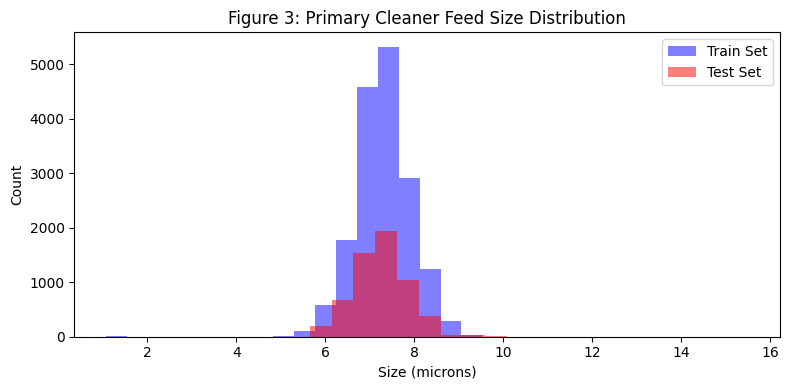

In [22]:
# Let's plot the distributions for the Primary Cleaner Input Feed Sizes for both sets

plt.figure(figsize=(8,4))
plt.hist(feed_size_train['primary_cleaner.input.feed_size'], bins=20, alpha = 0.5, label = 'Train Set', color = 'blue')
plt.hist(feed_size_test['primary_cleaner.input.feed_size'], bins=20, alpha = 0.5, label = 'Test Set', color = 'red')

plt.title('Figure 3: Primary Cleaner Feed Size Distribution')
plt.xlabel('Size (microns)')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

<span style=color:blue> Comments: First I identified all columns relating to the feed size in both test and train sets and saw it was the same for both: primary cleaner input and rougher input. This makes sense based on the process flow chart. Next I viewed the summary statistics for both features in both sets and just from this we can already predict the data to be similar in distributions. For example, the mean for primary cleaner in both sets is around 7.2 and a std around 0.6. Additionally, the mean for rougher in both sets is between 55 and 60, and std of between 22 and 30, which is not too far off considering the train set has 3 times as many datapoints. These statistics are just an overview and not to be used to formulate conclusions. As such,
let's graph the overall distributions for both features in both datsets and make our conclusiong based on the visualizations.

<span style=color:blue>Comments: In Figure 2, we compare the Rougher Feed Size Distributions between the train and test sets and we see an overall very similar distributions. We see a peak around 50 microns and most of the data for both lies within 0 and 150 microns with very some outlier beyond the 200 microns range. Looking at Figure 3, we see the same traits as well. Both distributions for the Primary Cleaner Feed Size in the test and train sets are very similar here as well. They both peak closer to the 7 microns with most of the data being between 5 and 10 microns and some outliers outside those values. As such we can conclude that both the distributions for test and trainsets are similar and differences are very limites, which means the model evaluation should be more reliable.

<b> 2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

In [23]:
# Let's set up the stage variables for Feed, Rougher and Final based on the appropriate columns
# Then let's create new features to store the total concentrations

feed_stage = train[['rougher.input.feed_ag', 'rougher.input.feed_au', 
             'rougher.input.feed_pb']].copy()

rougher_stage = train[['rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
                'rougher.output.concentrate_pb']].copy()

final_stage = train[['final.output.concentrate_ag', 'final.output.concentrate_au', 
               'final.output.concentrate_pb']].copy()

feed_stage['feed_total_conc'] = feed_stage.sum(axis=1)
rougher_stage['rougher_total_conc'] = rougher_stage.sum(axis=1)
final_stage['final_total_conc'] = final_stage.sum(axis=1)

In [24]:
# Let's check Summary Statistics for an overview of the distributions
print(feed_stage['feed_total_conc'].describe())
print()
print(rougher_stage['rougher_total_conc'].describe())
print()
print(final_stage['final_total_conc'].describe())

count    16860.000000
mean        18.136907
std          7.407993
min          0.000000
25%         16.093185
50%         18.713815
75%         22.327806
max         35.071987
Name: feed_total_conc, dtype: float64

count    16860.000000
mean        34.740842
std         13.697400
min          0.000000
25%         36.609887
50%         39.457951
75%         41.635606
max         55.568687
Name: rougher_total_conc, dtype: float64

count    16860.000000
mean        53.101335
std         18.691789
min          0.000000
25%         58.523841
50%         59.984051
75%         60.934848
max         65.575259
Name: final_total_conc, dtype: float64


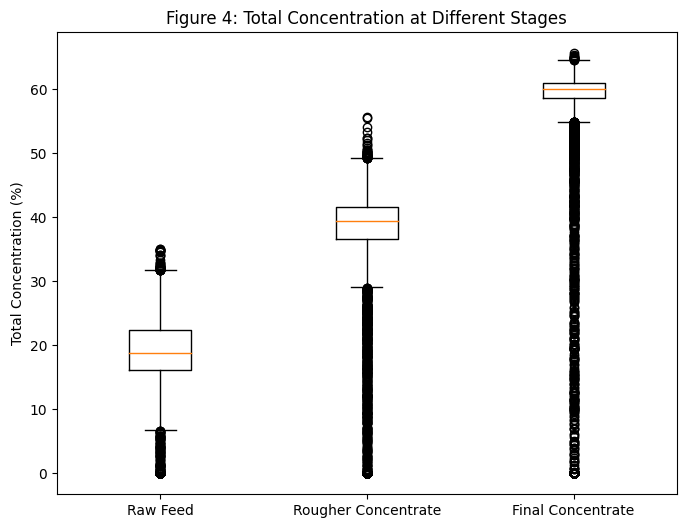

In [25]:
# Let's plot the distributions to visualize any anamolies
plt.figure(figsize=(8,6))
plt.boxplot([feed_stage['feed_total_conc'], 
             rougher_stage['rougher_total_conc'], final_stage['final_total_conc']],
            labels=['Raw Feed','Rougher Concentrate', 'Final Concentrate'])

plt.title("Figure 4: Total Concentration at Different Stages")
plt.ylabel('Total Concentration (%)')
plt.show()

<span style = color:blue> Comments: First I created 3 new dfs, one for each stage, and each df consists of 4 features associated to that stage. For instance the Raw Feed Stage includes the rougher.input.feed.X, where X = ag, au and pb. Next, I calculated the total concentration across each stage (summing all the substances) and created 3 new columns, one for each stage. I viewed basic statistics with describe() just to get an idea of the overview. Finally, I created 1 boxplot to show the total concentrations of all substances, at each stage. As per the graph above (Figure 4), there are a couple points that stand out. First, there are a lot of outlier points for each of the stages. We can see a clear increase in the distributions of the total concentration as we move from Raw Feed to Final Concentrate, and this makes a lot of sense as we've seen from findings earlier in the project. Lastly, we can also see that the variability in the datapoints decreases as we move from Raw to Final Concentrate. Now, I cannot based on my findings justify an points to be anamolies yet. I would need to further investigate the outliers; as such, I don't think we can remove any values from the samples or claim any points as outright anamolies. 

<b> 3.1 Write a function to calculate the final sMAPE value.

In [26]:
import numpy as np

def smape(target, prediction):
    numerator = np.abs(target - prediction)
    denominator = (np.abs(target) + np.abs(prediction)) / 2
    return np.mean(numerator / denominator) * 100

def final_smape(target_rougher, prediction_rougher, target_final, prediction_final):
    smape_rougher = smape(target_rougher, prediction_rougher)
    smape_final = smape(target_final, prediction_final)
    final_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return final_smape
    

<b> 3.2: Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [27]:
# Let's import all necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
# Let's define the variables
target_rougher = 'rougher.output.recovery'
target_final = 'final.output.recovery'

features_train = train.drop(columns=list(test_features_missing))
features_train = features_train.drop('date', axis=1)

target_rougher_train = train[target_rougher]
target_final_train = train[target_final]

print(features_train.shape, target_rougher_train.shape, target_final_train.shape)

(16860, 52) (16860,) (16860,)


In [29]:
# Let's train different models

model = {
    'LinearRegression' : make_pipeline(StandardScaler(),LinearRegression()),
    'DecisionTree' : DecisionTreeRegressor(max_depth = 20, random_state=123),
    'RandomForest' : RandomForestRegressor(n_estimators=100, max_depth = 20, max_samples = 0.5,
                                           random_state=123) }

results = {}

# Let's build a function to cross-validate all the models

cv = KFold(n_splits=5, shuffle=True, random_state=123)

for name, model in model.items():
    prediction_rougher = cross_val_predict(model, features_train, target_rougher_train, cv=cv)
    prediction_final = cross_val_predict(model, features_train, target_final_train, cv=cv)
    score = final_smape(target_rougher_train, prediction_rougher, target_final_train, prediction_final)
    results[name] = score
    print(f"{name} - Cross-validated final sMAPE: {score:.2f}%")

LinearRegression - Cross-validated final sMAPE: 13.34%
DecisionTree - Cross-validated final sMAPE: 9.53%
RandomForest - Cross-validated final sMAPE: 9.19%


<span style = color:blue> Comments: First I imported all the necessary packages for the 3 models along with cross_val_predict and Kfold for cross-validation purposes. I chose Kfold as it is fast and reliable for cross-validation; however, if there is a better method, please do let me know. Next I also imported make_pipeline and standardscaler because I already knew that using standardscaler is a great strategy when working with features of varying range in values. I learned how to use scaler from the sprints but I did some external research and learned of a more effective and cleaner way by using make_pipeline. This really makes the code less bulky and easier to debug in case of errors.

<span style=color:blue> Comments: Next, I defined my target variables for rougher and final for the train set. In order to define my features_train variable, I had to drop all the features that are in the train set but not in the test set. The reason for doing this is not over train the model by training it on the features that we cannot test since they are not in the test set. I had already defined test_features_missing earlier in the project, so for my features_train I just dropped all the missing columns. I also dropped the date feature since it is not useful in the model building. I checked the shape of my targets and feature and they are equal.

<span style=color:blue>Comments: Finally I moved on to building the models and cross-validating them using Kfold. I defined a function so I didn't have to repeat the code 3 times. The cross validation function takes the 3 different models with the hyperparameters I assigned and runs them through the final_smape function (previously defined) and then outputs a value of that final smape. Based on the results, we can see that LinearRegression is 13.34%, DecisionTree is 9.53% and RandomForest is 9.19%. Therefore, based on the least final sMAPE we should choose DecisionTreeRegressor model and use it to test on the test set.

In [30]:
# Let's test the model on the Test set
# lett's import the missing targets from the Full set
test_new = test.merge(full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                      on = 'date', how='left')

target_rougher_test = test_new['rougher.output.recovery']
target_final_test = test_new['final.output.recovery']

features_test = test_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
print(features_test.shape, features_train.shape)

(5856, 52) (16860, 52)


In [31]:
# Let's Train our chosen model on training set

model_rougher = RandomForestRegressor(n_estimators=100, max_depth = 20, max_samples = 0.5, random_state=123)
model_rougher.fit(features_train, target_rougher_train)

model_final = RandomForestRegressor(n_estimators=100, max_depth = 20, max_samples = 0.5, random_state=123)
model_final.fit(features_train, target_final_train)

# Let's make predictions on the Test Set
prediction_rougher_test = model_rougher.predict(features_test)
prediction_final_test = model_final.predict(features_test)

print(prediction_rougher_test.shape, prediction_final_test.shape)

(5856,) (5856,)


In [32]:
# Let's Compute sMAPE on test set
test_smape = final_smape(target_rougher_test, prediction_rougher_test, target_final_test, prediction_final_test)
print(f'Final sMAPE using RandomForestRegressor on the Test Set = {test_smape:.2f}%')

Final sMAPE using RandomForestRegressor on the Test Set = 14.23%


<span style = color:blue> Comments: After cross-validation, we determined RandomForestRegressor as the best model based on the smallest final sMAPE value. Next, I has to test this model on the model set, however, the issue is that the test set does not have the target variables that are in the train set. To resolve this issue, I imported the target variables from the Full Dataset and merged them into the Test set. I hope this is the correct method here but it seems correct since there is no other usage for the full dataset in the project.

<span style=color:blue> Comments: Next, I defined my target_test and features_test variables and verified the size of features_train and features_test was equal. Then I trained my RandomForestRegressor model on the training set and finalyl test it on the Test Set. Once again, I used the final_smape function to evaluate the overall quality of the model. My value was 14% and since there is no project assigned metric for this value, I did a google search and found that under 20% is considered good for ore extractions so I think 14% is great but please let me know if something is incorrect.

#### Conclusion
<span style = color:blue> Comments: Overall this was a great project because it showed that in the real world there can datafiles with very large number of entries and a lot of that data can also be missing. In such cases, we need to apply different tactics to overcome the issue of missing data, in this project I decided to use forwardfill since the prompt gave some insight stating that datapoints close in datetime should be similar in value. Without this knowledge it would be difficult to know if we can forwarfill. Next, I enjoyed learning about the technological process of gold extraction from the ore and that was necessary to develop the rest of the project. For example, we need to understand concepts of recovery and also symmetric Mean Absolute Percentage Error (sMAPE). Metrics like these are critical in Data Analysis because they help centralize the focus of the project and quantify what the data means. Additionally, I practiced my function defining coding skills and combined that with model building/training skills. I learned how to utilize a function to apply cross-validation techniques like k-fold to evaulate which model is the best. I used the final smape metric since that is what we are using here to determine the results. I found RandomForestRegressor to be the best model from the cross-validation process and used that same model on the Test set. I learned to import data from other sources when it is missing as I merged the Full Datset target variables into the Test set. Lastly, I calculated the final sMAPE on my test set using my model and it gave a value of 14%. I believe this project really helped me elavate my understanding of machine learning.